In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
tscovid = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv', sep=',')

In [4]:
artime = tscovid.iloc[0:405, 4:54]

In [5]:
days = pd.date_range('2020/1/22', periods=50, freq='D')

In [6]:
artime = artime.T

In [7]:
artime.head()

,0,1,2,3,4,5,6,7,8,9,...,395,396,397,398,399,400,401,402,403,404
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
artime = pd.DataFrame(artime)

In [9]:
df = tscovid.iloc[0:405, 4:54]

In [10]:
total = df.sum(axis=0)

In [11]:
total

1/22/20      17
1/23/20      18
1/24/20      26
1/25/20      42
1/26/20      56
1/27/20      82
1/28/20     131
1/29/20     133
1/30/20     171
1/31/20     213
2/1/20      259
2/2/20      362
2/3/20      426
2/4/20      492
2/5/20      564
2/6/20      634
2/7/20      719
2/8/20      806
2/9/20      906
2/10/20    1013
2/11/20    1113
2/12/20    1118
2/13/20    1371
2/14/20    1523
2/15/20    1666
2/16/20    1770
2/17/20    1868
2/18/20    2007
2/19/20    2122
2/20/20    2247
2/21/20    2251
2/22/20    2458
2/23/20    2469
2/24/20    2629
2/25/20    2708
2/26/20    2770
2/27/20    2814
2/28/20    2872
2/29/20    2941
3/1/20     2996
3/2/20     3085
3/3/20     3160
3/4/20     3254
3/5/20     3347
3/6/20     3458
3/7/20     3556
3/8/20     3799
3/9/20     3984
3/10/20    4256
3/11/20    4607
dtype: int64

In [12]:
artime['Total'] = total

In [13]:
artime['Day'] = days

In [14]:
artime.set_index('Day', inplace=True)

In [15]:
artime['Total']

Day
2020-01-22      17
2020-01-23      18
2020-01-24      26
2020-01-25      42
2020-01-26      56
2020-01-27      82
2020-01-28     131
2020-01-29     133
2020-01-30     171
2020-01-31     213
2020-02-01     259
2020-02-02     362
2020-02-03     426
2020-02-04     492
2020-02-05     564
2020-02-06     634
2020-02-07     719
2020-02-08     806
2020-02-09     906
2020-02-10    1013
2020-02-11    1113
2020-02-12    1118
2020-02-13    1371
2020-02-14    1523
2020-02-15    1666
2020-02-16    1770
2020-02-17    1868
2020-02-18    2007
2020-02-19    2122
2020-02-20    2247
2020-02-21    2251
2020-02-22    2458
2020-02-23    2469
2020-02-24    2629
2020-02-25    2708
2020-02-26    2770
2020-02-27    2814
2020-02-28    2872
2020-02-29    2941
2020-03-01    2996
2020-03-02    3085
2020-03-03    3160
2020-03-04    3254
2020-03-05    3347
2020-03-06    3458
2020-03-07    3556
2020-03-08    3799
2020-03-09    3984
2020-03-10    4256
2020-03-11    4607
Name: Total, dtype: int64

In [16]:
from statsmodels.tsa.ar_model import AR,ARResults

In [17]:
train = artime.iloc[:42]
test = artime.iloc[42:]

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
model = AR(train['Total'])
AR1fit = model.fit(maxlag=2,method='cmle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 2
Coefficients:
const       60.169904
L1.Total     1.025845
L2.Total    -0.012929
dtype: float64


In [20]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end).rename('AR(1) Predictions')

In [21]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]}, expected={test['Total'][i]}")

predicted=3261.954038785016, expected=3254
predicted=3365.573399385171, expected=3347
predicted=3470.5526353580544, expected=3458
predicted=3576.9053617220775, expected=3556
predicted=3684.649494465544, expected=3799
predicted=3793.8032365860063, expected=3984
predicted=3904.3850299011056, expected=4256
predicted=4016.4135575101354, expected=4607


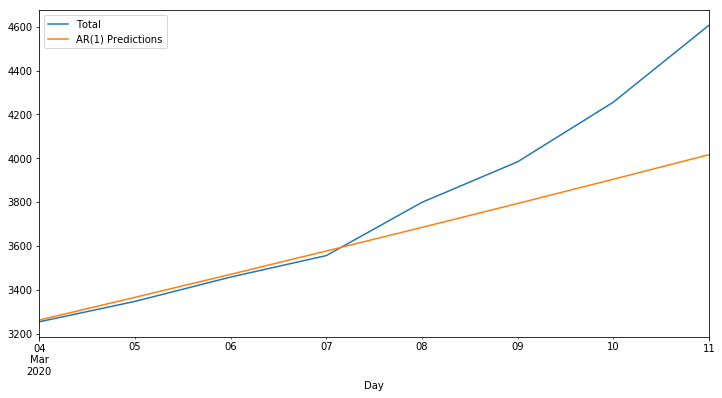

In [22]:
test['Total'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

In [23]:
AR2fit = model.fit(maxlag=2,method='cmle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const       60.169904
L1.Total     1.025845
L2.Total    -0.012929
dtype: float64


In [24]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end).rename('AR(2) Predictions')

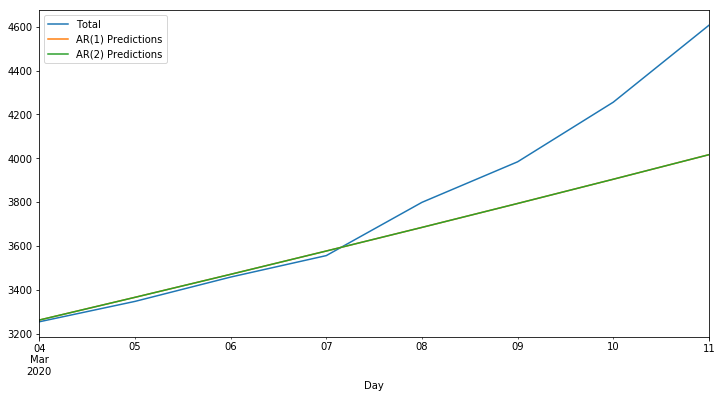

In [25]:
test['Total'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [26]:
ARfit = model.fit(maxlag=2,method='cmle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 2
Coefficients:
const       60.169904
L1.Total     1.025845
L2.Total    -0.012929
dtype: float64


In [27]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(12) Predictions'

predictions11 = ARfit.predict(start=start,end=end).rename(rename)

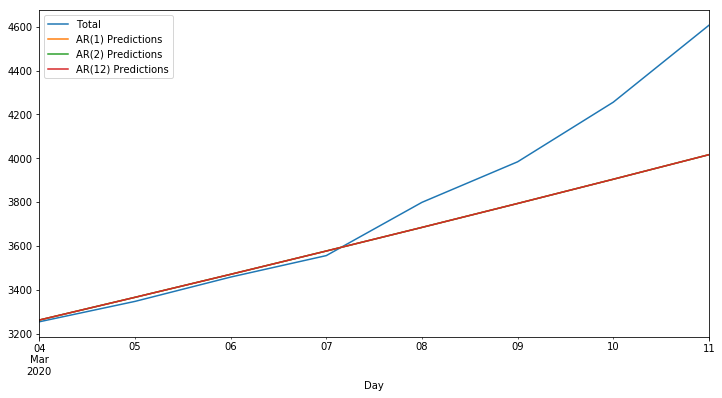

In [28]:
test['Total'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

In [29]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['Total'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 65334.89011
AR(2) Error: 65334.89011
AR(11) Error: 65334.89011


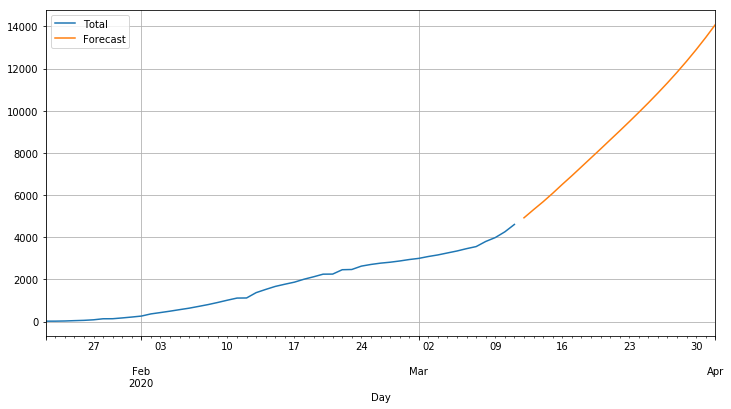

In [30]:
model = AR(artime['Total'])

# Next, fit the model
ARfit = model.fit(maxlag=8)

# Make predictions
fcast = ARfit.predict(start=len(artime), end=len(artime)+20).rename('Forecast')

# Plot the results
artime['Total'].plot(legend=True)
fcast.plot(legend=True, grid=True, figsize=(12,6));

In [31]:
print('Expectative for coronavirus deaths till April 01 is', fcast)

Expectative for coronavirus deaths till April 01 is 2020-03-12     4921.371589
2020-03-13     5307.473790
2020-03-14     5683.215876
2020-03-15     6084.313163
2020-03-16     6505.520214
2020-03-17     6914.453739
2020-03-18     7336.696027
2020-03-19     7760.788020
2020-03-20     8183.360771
2020-03-21     8614.191928
2020-03-22     9041.688415
2020-03-23     9477.793811
2020-03-24     9921.747216
2020-03-25    10374.392654
2020-03-26    10841.632024
2020-03-27    11323.954588
2020-03-28    11825.921645
2020-03-29    12350.804754
2020-03-30    12899.906736
2020-03-31    13477.294531
2020-04-01    14084.528247
Freq: D, Name: Forecast, dtype: float64
